In [1]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [3]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [9]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/450
12/12 [==============================] - 0s 10ms/sample - loss: 514.5016 - root_mean_squared_error: 22.6826
Epoch 2/450
12/12 [==============================] - 0s 0s/sample - loss: 502.7364 - root_mean_squared_error: 22.4218
Epoch 3/450
12/12 [==============================] - 0s 83us/sample - loss: 494.3326 - root_mean_squared_error: 22.2336
Epoch 4/450
12/12 [==============================] - 0s 83us/sample - loss: 487.3738 - root_mean_squared_error: 22.0765
Epoch 5/450
12/12 [==============================] - 0s 83us/sample - loss: 481.2531 - root_mean_squared_error: 21.9375
Epoch 6/450
12/12 [==============================] - 0s 84us/sample - loss: 475.6897 - root_mean_squared_error: 21.8103
Epoch 7/450
12/12 [==============================] - 0s 82us/sample - loss: 470.5271 - root_mean_squared_error: 21.6916
Epoch 8/450
12/12 [==============================] - 0s 167us/sample - loss: 465.6681 - root_mean_squared_error: 21.5793
Epoch 9/450
12/12 [======================

Epoch 69/450
12/12 [==============================] - 0s 83us/sample - loss: 272.5016 - root_mean_squared_error: 16.5076
Epoch 70/450
12/12 [==============================] - 0s 83us/sample - loss: 269.9009 - root_mean_squared_error: 16.4287
Epoch 71/450
12/12 [==============================] - 0s 83us/sample - loss: 267.3133 - root_mean_squared_error: 16.3497
Epoch 72/450
12/12 [==============================] - 0s 83us/sample - loss: 264.7388 - root_mean_squared_error: 16.2708
Epoch 73/450
12/12 [==============================] - 0s 83us/sample - loss: 262.1775 - root_mean_squared_error: 16.1919
Epoch 74/450
12/12 [==============================] - 0s 82us/sample - loss: 259.6293 - root_mean_squared_error: 16.1130
Epoch 75/450
12/12 [==============================] - 0s 83us/sample - loss: 257.0941 - root_mean_squared_error: 16.0342
Epoch 76/450
12/12 [==============================] - 0s 0s/sample - loss: 254.5721 - root_mean_squared_error: 15.9553
Epoch 77/450
12/12 [==============

Epoch 137/450
12/12 [==============================] - 0s 83us/sample - loss: 125.2114 - root_mean_squared_error: 11.1898
Epoch 138/450
12/12 [==============================] - 0s 83us/sample - loss: 123.4889 - root_mean_squared_error: 11.1126
Epoch 139/450
12/12 [==============================] - 0s 84us/sample - loss: 121.7790 - root_mean_squared_error: 11.0354
Epoch 140/450
12/12 [==============================] - 0s 83us/sample - loss: 120.0820 - root_mean_squared_error: 10.9582
Epoch 141/450
12/12 [==============================] - 0s 84us/sample - loss: 118.3976 - root_mean_squared_error: 10.8811
Epoch 142/450
12/12 [==============================] - 0s 0s/sample - loss: 116.7259 - root_mean_squared_error: 10.8040
Epoch 143/450
12/12 [==============================] - 0s 83us/sample - loss: 115.0670 - root_mean_squared_error: 10.7269
Epoch 144/450
12/12 [==============================] - 0s 83us/sample - loss: 113.4207 - root_mean_squared_error: 10.6499
Epoch 145/450
12/12 [=====

Epoch 206/450
12/12 [==============================] - 0s 84us/sample - loss: 35.8043 - root_mean_squared_error: 5.9837
Epoch 207/450
12/12 [==============================] - 0s 165us/sample - loss: 34.9394 - root_mean_squared_error: 5.9110
Epoch 208/450
12/12 [==============================] - 0s 86us/sample - loss: 34.0864 - root_mean_squared_error: 5.8384
Epoch 209/450
12/12 [==============================] - 0s 83us/sample - loss: 33.2453 - root_mean_squared_error: 5.7659
Epoch 210/450
12/12 [==============================] - 0s 82us/sample - loss: 32.4162 - root_mean_squared_error: 5.6935
Epoch 211/450
12/12 [==============================] - 0s 82us/sample - loss: 31.5990 - root_mean_squared_error: 5.6213
Epoch 212/450
12/12 [==============================] - 0s 83us/sample - loss: 30.7937 - root_mean_squared_error: 5.5492
Epoch 213/450
12/12 [==============================] - 0s 83us/sample - loss: 30.0003 - root_mean_squared_error: 5.4773
Epoch 214/450
12/12 [==================

Epoch 275/450
12/12 [==============================] - 0s 83us/sample - loss: 2.5041 - root_mean_squared_error: 1.5824
Epoch 276/450
12/12 [==============================] - 0s 0s/sample - loss: 2.3706 - root_mean_squared_error: 1.5397
Epoch 277/450
12/12 [==============================] - 0s 83us/sample - loss: 2.2447 - root_mean_squared_error: 1.4982
Epoch 278/450
12/12 [==============================] - 0s 84us/sample - loss: 2.1264 - root_mean_squared_error: 1.4582
Epoch 279/450
12/12 [==============================] - 0s 82us/sample - loss: 2.0154 - root_mean_squared_error: 1.4196
Epoch 280/450
12/12 [==============================] - 0s 83us/sample - loss: 1.9115 - root_mean_squared_error: 1.3826
Epoch 281/450
12/12 [==============================] - 0s 83us/sample - loss: 1.8145 - root_mean_squared_error: 1.3470
Epoch 282/450
12/12 [==============================] - 0s 82us/sample - loss: 1.7243 - root_mean_squared_error: 1.3131
Epoch 283/450
12/12 [=============================

Epoch 344/450
12/12 [==============================] - 0s 82us/sample - loss: 0.9004 - root_mean_squared_error: 0.9489
Epoch 345/450
12/12 [==============================] - 0s 83us/sample - loss: 0.8994 - root_mean_squared_error: 0.9483
Epoch 346/450
12/12 [==============================] - 0s 83us/sample - loss: 0.8983 - root_mean_squared_error: 0.9478
Epoch 347/450
12/12 [==============================] - 0s 84us/sample - loss: 0.8973 - root_mean_squared_error: 0.9472
Epoch 348/450
12/12 [==============================] - 0s 83us/sample - loss: 0.8962 - root_mean_squared_error: 0.9467
Epoch 349/450
12/12 [==============================] - 0s 83us/sample - loss: 0.8952 - root_mean_squared_error: 0.9462
Epoch 350/450
12/12 [==============================] - 0s 82us/sample - loss: 0.8943 - root_mean_squared_error: 0.9457
Epoch 351/450
12/12 [==============================] - 0s 166us/sample - loss: 0.8933 - root_mean_squared_error: 0.9451
Epoch 352/450
12/12 [==========================

Epoch 413/450
12/12 [==============================] - 0s 83us/sample - loss: 0.8765 - root_mean_squared_error: 0.9362
Epoch 414/450
12/12 [==============================] - 0s 82us/sample - loss: 0.8767 - root_mean_squared_error: 0.9363
Epoch 415/450
12/12 [==============================] - 0s 83us/sample - loss: 0.8770 - root_mean_squared_error: 0.9365
Epoch 416/450
12/12 [==============================] - 0s 84us/sample - loss: 0.8773 - root_mean_squared_error: 0.9367
Epoch 417/450
12/12 [==============================] - 0s 84us/sample - loss: 0.8775 - root_mean_squared_error: 0.9367
Epoch 418/450
12/12 [==============================] - 0s 84us/sample - loss: 0.8775 - root_mean_squared_error: 0.9367
Epoch 419/450
12/12 [==============================] - 0s 82us/sample - loss: 0.8773 - root_mean_squared_error: 0.9367
Epoch 420/450
12/12 [==============================] - 0s 0s/sample - loss: 0.8771 - root_mean_squared_error: 0.9365
Epoch 421/450
12/12 [=============================

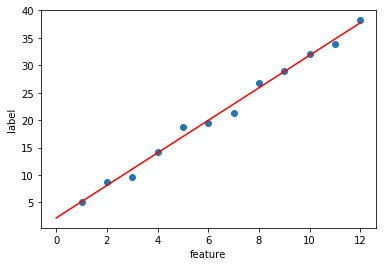

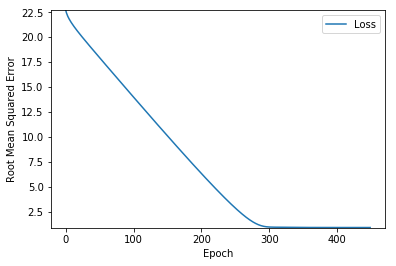

In [19]:
learning_rate=0.01
epochs=450
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)